# Задание 5. Деревья решений и сравнение результатов классификации

## 0. Импорт библиотек, загрузка и обработка данных.

### Подключим библиотеки.

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.exceptions import NotFittedError

### Считаем данные

In [2]:
#files.upload()
product_data_Ogneva = pd.read_csv('ABBREV_with_classes_Ogneva.csv', delimiter=';')
product_data_Kireeva = pd.read_csv('ABBREV_with_classes_Kireeva.csv', delimiter=';')
product_data_course = pd.read_csv('ABBREV_with_classes.csv', delimiter=';')

gse = pd.read_excel('5_OGE_2019_Эксперты и анализ.xlsx').drop(['GIA', 'Код предмета', 'Предмет'], axis=1)

### Объединим датасеты и переименуем колонки.

In [3]:
df = product_data_course.join([product_data_Ogneva[['Energ_Kcal_binary_class', 'Energ_Kcal_multiple_class']], \
                               product_data_Kireeva[['Origin', 'Lipid_multiple_class']]]) \
.rename(columns={'Energ_Kcal_binary_class': 'Ogneva_bin', 'Energ_Kcal_multiple_class': 'Ogneva_mult', \
                 'Origin': 'Kireeva_bin', 'Lipid_multiple_class': 'Kireeva_mult'})

### Удалим текстовые и ненужные колонки.

In [4]:
df = df.drop(['Shrt_Desc', 'GmWt_Desc1', 'GmWt_Desc2'], axis=1)

gse = gse.drop(['Краткое наименование ОО', 'Вид ОО', 'Тип ОО', 'Выпускник', 'Вариант', 'Часть D', 'Оцека по 100', 'Первичный балл', '% Оценка'], axis=1)

### Сделаем числовыми текстовые колонкми.

In [5]:
df['Ogneva_bin'] = df['Ogneva_bin'].replace({'High': 1, 'Low': 0})
df['Ogneva_mult'] = df['Ogneva_mult'].replace({'Extremely high': 4, 'High': 3, 'Moderate': 2, 'Low': 1, 'Extremely low': 0})

df['Kireeva_bin'] = df['Kireeva_bin'].replace({'Animal': 1, 'Vegetable': 0})
df['Kireeva_mult'] = df['Kireeva_mult'].replace({'High': 2, 'Average': 1, 'Low': 0})

df['CLASS'] = df['CLASS'].replace({10: 2, 11: 3})

for i in range(1, 19):
  gse[str(i) + '_Часть В'] = gse[str(i) + '_Часть В'].apply(lambda x: 0 if x == '-' else 1)
gse['Часть В'] = gse['Часть В'].apply(lambda x: x.count('+'))
gse['Часть С'] = gse['1_Часть С'] + gse['2_Часть С']

### Заведем списки колонок.

In [6]:
class_columns = ['CLASS', 'Ogneva_bin', 'Ogneva_mult', 'Kireeva_bin', 'Kireeva_mult']
unused_columns = ['NDB_No']

gse_features_B = [str(x) + '_Часть В' for x in range(1, 19)]
gse_features_B.append('Часть В')
gse_features_C = ['1_Часть С', '2_Часть С', 'Часть С']
gse_target = 'Оцека по 5'

## 1. Использовать деревья решений для классификации данных из предыдущего задания (своих, товарища и представленных в задании). Проверить, приведёт ли нормализация или замена части признаков бинарными к улучшению результатов. Также построить деревья на части признаков, перебирая все N'ки или выбирая N признаков случайным образом. Вывести в каком-либо удобочитаемом виде содержимое узлов "лучших" из построенных деревьев.


### Без нормализации и замены части признаков бинарными.

#### Мой датасет, бинарная классификация.

In [7]:
X, y = df[['Energ_Kcal']], df['Ogneva_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = tree.DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"f1-score: {f1_score(y_test, y_pred, average='weighted')}")

f1-score: 1.0


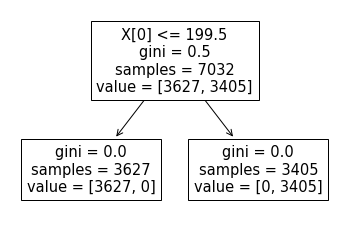

In [8]:
#plt.figure(figsize=(15, 10))
tree.plot_tree(model);

#### Мой датасет, многоклассовая классификация.

In [9]:
X, y = df[['Energ_Kcal']], df['Ogneva_mult']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = tree.DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"f1-score: {f1_score(y_test, y_pred, average='weighted')}")

f1-score: 1.0


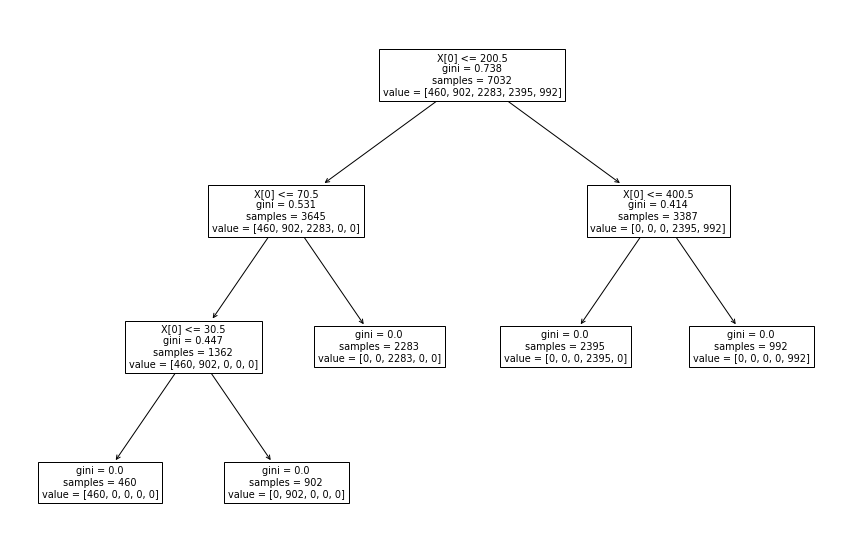

In [10]:
plt.figure(figsize=(15, 10))
tree.plot_tree(model);

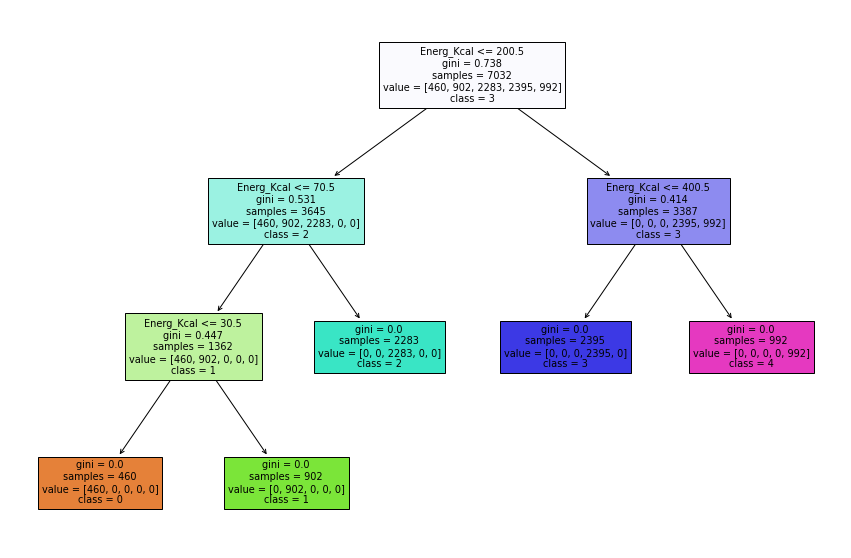

In [11]:
plt.figure(figsize=(15, 10))
tree.plot_tree(model, feature_names=['Energ_Kcal'], class_names=['0', '1', '2', '3', '4'], filled=True);

#### Ритин датасет, бинарная классификация.

In [12]:
X, y = df[['Cholestrl_(mg)']], df['Kireeva_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = tree.DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"f1-score: {f1_score(y_test, y_pred, average='weighted')}")

f1-score: 1.0


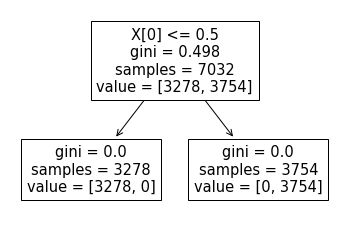

In [13]:
#plt.figure(figsize=(10, 10))
tree.plot_tree(model);

#### Ритин датасет, многоклассовая классификация.

In [14]:
X, y = df[['Lipid_Tot_(g)']], df['Kireeva_mult']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = tree.DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"f1-score: {f1_score(y_test, y_pred, average='weighted')}")

f1-score: 1.0


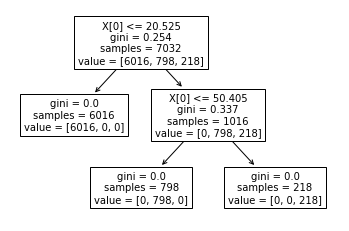

In [15]:
#plt.figure(figsize=(10, 10))
tree.plot_tree(model);

#### Датасет с курса.

In [16]:
X, y = df[['Water_(g)', 'Sugar_Tot_(g)']], df['CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = tree.DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"f1-score: {f1_score(y_test, y_pred, average='weighted')}")

f1-score: 1.0


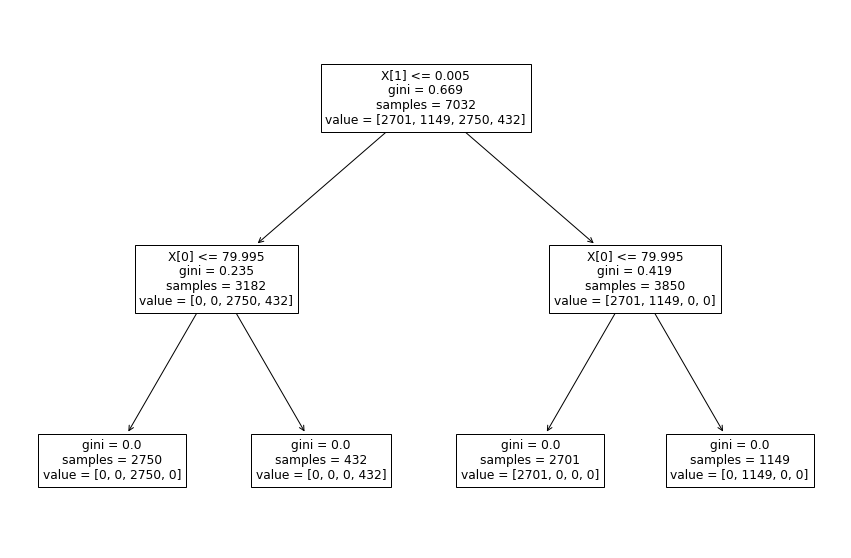

In [17]:
plt.figure(figsize=(15, 10))
tree.plot_tree(model);

### С нормализацией

#### Pipeline

**Нормализация**. Можно использовать `MinMaxScaler` или `MaxAbsScaler` из `sklearn`. Я выбрала первое. Для удобства обернула шаги нормализации и дерева в пайплайн.

$$normalised\_X = \frac{X - min(X)}{max(X) - min(X)}$$, where $X$ is **feature column**

In [18]:
pipeline_norm = Pipeline([
        ('sca', MinMaxScaler()),
        ('clf', tree.DecisionTreeClassifier(random_state=42))
    ])

display(pipeline_norm)

Pipeline(steps=[('sca', MinMaxScaler()),
                ('clf', DecisionTreeClassifier(random_state=42))])

#### Мой датасет, бинарная классификация.

In [ ]:
X, y = df[['Energ_Kcal']], df['Ogneva_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = Pipeline([
        ('sca', MinMaxScaler()),
        ('clf', tree.DecisionTreeClassifier(random_state=42))
    ])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"f1-score: {f1_score(y_test, y_pred, average='weighted')}")

f1-score: 1.0


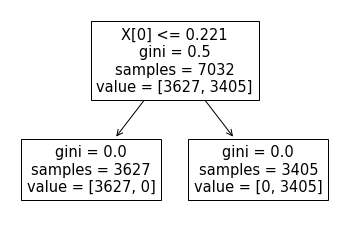

In [ ]:
#plt.figure(figsize=(15, 10))
tree.plot_tree(model['clf']);

#### Мой датасет, многоклассовая классификация.

In [ ]:
X, y = df[['Energ_Kcal']], df['Ogneva_mult']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = Pipeline([
        ('sca', MinMaxScaler()),
        ('clf', tree.DecisionTreeClassifier(random_state=42))
    ])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"f1-score: {f1_score(y_test, y_pred, average='weighted')}")

f1-score: 1.0


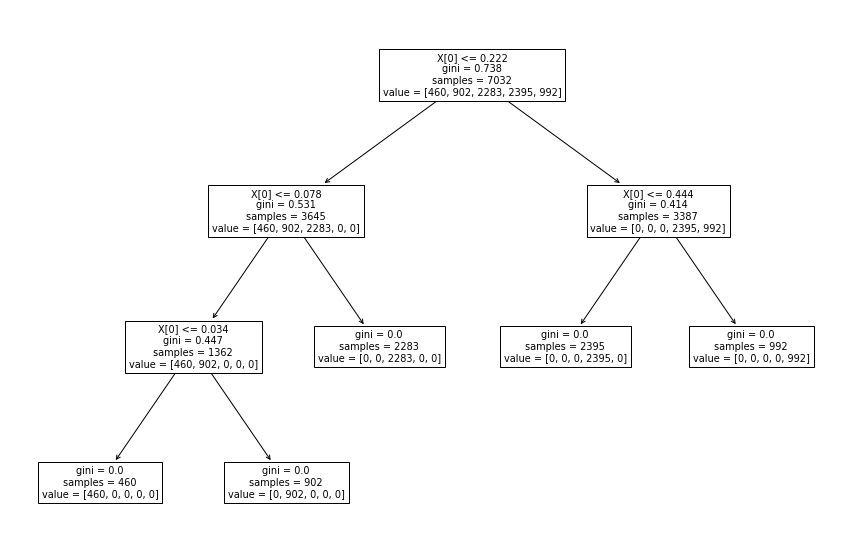

In [ ]:
plt.figure(figsize=(15, 10))
tree.plot_tree(model['clf']);

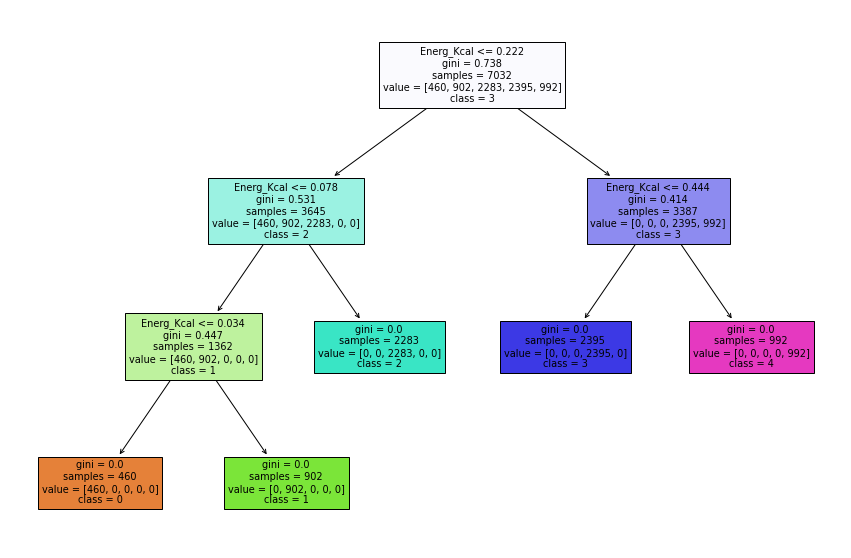

In [ ]:
plt.figure(figsize=(15, 10))
tree.plot_tree(model['clf'], feature_names=['Energ_Kcal'], class_names=['0', '1', '2', '3', '4'], filled=True);

#### Ритин датасет, бинарная классификация.

In [ ]:
X, y = df[['Cholestrl_(mg)']], df['Kireeva_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = Pipeline([
        ('sca', MinMaxScaler()),
        ('clf', tree.DecisionTreeClassifier(random_state=42))
    ])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"f1-score: {f1_score(y_test, y_pred, average='weighted')}")

f1-score: 1.0


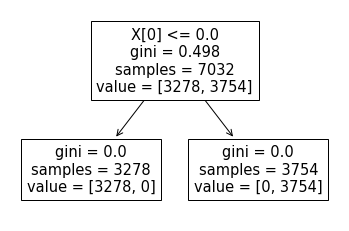

In [ ]:
#plt.figure(figsize=(15, 10))
tree.plot_tree(model['clf']);

#### Ритин датасет, многоклассовая классификация.

In [ ]:
X, y = df[['Lipid_Tot_(g)']], df['Kireeva_mult']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = Pipeline([
        ('sca', MinMaxScaler()),
        ('clf', tree.DecisionTreeClassifier(random_state=42))
    ])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"f1-score: {f1_score(y_test, y_pred, average='weighted')}")

f1-score: 1.0


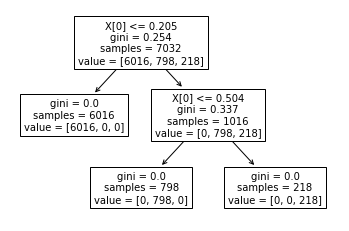

In [ ]:
#plt.figure(figsize=(15, 10))
tree.plot_tree(model['clf']);

#### Датасет с курса

In [ ]:
X, y = df[['Water_(g)', 'Sugar_Tot_(g)']], df['CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = Pipeline([
        ('sca', MinMaxScaler()),
        ('clf', tree.DecisionTreeClassifier(random_state=42))
    ])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"f1-score: {f1_score(y_test, y_pred, average='weighted')}")

f1-score: 1.0


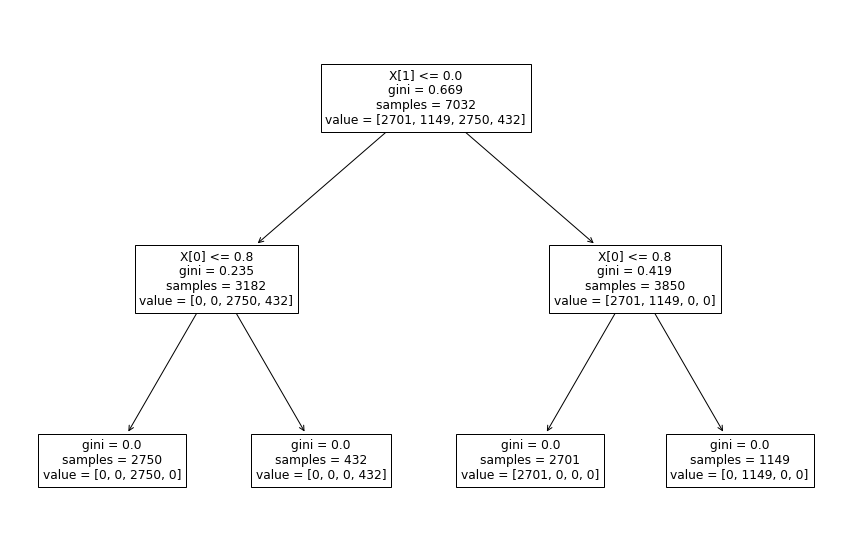

In [ ]:
plt.figure(figsize=(15, 10))
tree.plot_tree(model['clf']);

#### Вывод. Так как алгоритм не использует подсчет расстояний между объектами, нормализация бессмысленна (а вот работу KNN она может улучшить).

### С заменой части признаков бинарными

#### Ритин датасет, бинарная классификация.

In [ ]:
df['Cholestrl_bin'] = df['Cholestrl_(mg)'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
X, y = df[['Cholestrl_bin']], df['Kireeva_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = tree.DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"f1-score: {f1_score(y_test, y_pred, average='weighted')}")

f1-score: 1.0


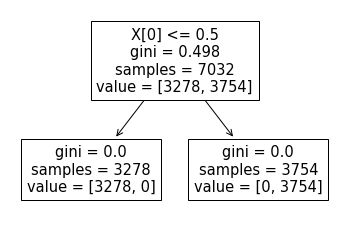

In [ ]:
#plt.figure(figsize=(10, 10))
tree.plot_tree(model);

#### Датасет с курса.

In [ ]:
df['Sugar_Tot_(g)_bin'] = df['Sugar_Tot_(g)'].apply(lambda x: 0 if x == 0 else 1)
df['Water_(g)_bin'] = df['Water_(g)'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
X, y = df[['Water_(g)_bin', 'Sugar_Tot_(g)']], df['CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = tree.DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"f1-score: {f1_score(y_test, y_pred, average='weighted')}")

f1-score: 0.7513711797871868


In [ ]:
X, y = df[['Water_(g)', 'Sugar_Tot_(g)_bin']], df['CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = tree.DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"f1-score: {f1_score(y_test, y_pred, average='weighted')}")

f1-score: 1.0


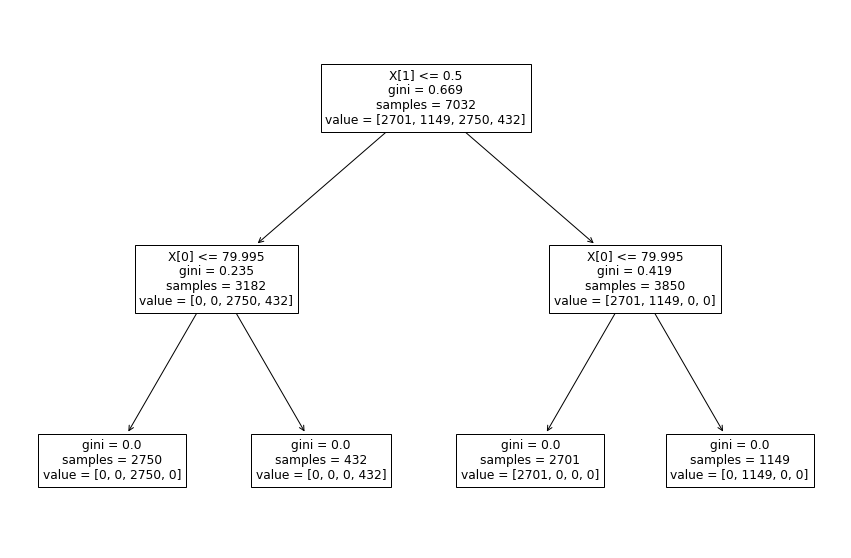

In [ ]:
plt.figure(figsize=(15, 10))
tree.plot_tree(model);

## 2. Использовать метод k-ближайших соседей и деревья решений для предсказания оценок ОГЭ (из задания 2).

#### По заданиям части B.

In [ ]:
X, y = gse[gse_features_B[:18:]], gse[gse_target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"f1-score: {f1_score(y_test, y_pred, average='micro')}")

f1-score: 0.807178631051753


In [ ]:
X, y = gse[gse_features_B[:18:]], gse[gse_target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = tree.DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"f1-score: {f1_score(y_test, y_pred, average='micro')}")

f1-score: 0.7829716193656093


#### По сумме баллов за часть B.

In [ ]:
X, y = gse[[gse_features_B[18]]], gse[gse_target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"f1-score: {f1_score(y_test, y_pred, average='micro')}")

f1-score: 0.8547579298831386


In [ ]:
X, y = gse[[gse_features_B[18]]], gse[gse_target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = tree.DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"f1-score: {f1_score(y_test, y_pred, average='micro')}")

f1-score: 0.890651085141903


#### По заданиям части C.

In [ ]:
X, y = gse[gse_features_C[:2:]], gse[gse_target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"f1-score: {f1_score(y_test, y_pred, average='micro')}")

f1-score: 0.6210350584307178


In [ ]:
X, y = gse[gse_features_C[:2:]], gse[gse_target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = tree.DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"f1-score: {f1_score(y_test, y_pred, average='micro')}")

f1-score: 0.6210350584307178


#### По сумме баллов за часть C.

In [ ]:
X, y = gse[[gse_features_C[2]]], gse[gse_target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"f1-score: {f1_score(y_test, y_pred, average='micro')}")

f1-score: 0.6218697829716193


In [ ]:
X, y = gse[[gse_features_C[2]]], gse[gse_target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = tree.DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"f1-score: {f1_score(y_test, y_pred, average='micro')}")

f1-score: 0.6218697829716193


## 3. Сделать выводы о преимуществах и недостатках рассмотренных методов классификации как в общем, так и применительно к рассмотренным задачам.

**Датасеты с продуктами.** В основном и KNN, и дерево решений выдают f1-score=1.0, за исключением случая с классификацией с курса с использованием столбца `Sugar_Tot_(g)`. KNN выдает f1-score=0.96, дерево решений же - f1-score=1. Если взять бинарный аналог данного столбца, KNN также выдает f1-score=1. То есть в случае этого датасета KNN работает чуть хуже. Преимущество дерева решений здесь в том, что оно не использует подсчет расстояний между объектами. Это подтверждается тем, что результат KNN улучшился после замены признака `Sugar_Tot_(g)` бинарным (не нормализация, но нечто похожее).

**Датасет с оценками.** f1-score считался с помощью микроусреднения. 
1. Предсказание с помощью **ряда баллов за часть B**. KNN f1-score=0.807178631051753, DT f1-score=0.7829716193656093. KNN показал результат лучше.
2. Предсказание с помощью **суммы баллов за часть B**. KNN f1-score=0.8547579298831386, DT f1-score=0.890651085141903. DT показал результат лучше.
3. Предсказание с помощью **ряда баллов за часть C**. KNN f1-score=DT f1-score=0.6210350584307178.
4. Предсказание с помощью **суммы баллов за часть C**. KNN f1-score=DT f1-score=0.6218697829716193.

Лучший результат оба метода показали на втором способе, дерево решений лучше. Затем идет первый способ, здесь лучше KNN. Третий и четвертый способы показывают примерно одинаковый результат. Оба метода работают одинаково.

## 4*. Реализовать дерево решений вручную.

### Интересные функции из numpy, использующиеся далее.

In [ ]:
# Count number of occurrences of each value in array of non-negative ints.
np.bincount(np.array([0, 1, 1, 3, 2, 1, 7]))

array([1, 3, 1, 1, 0, 0, 0, 1])

In [ ]:
# Clip (limit) the values in an array.
a = np.arange(10)
print(a)
print(np.clip(a, 1, 8))
print(np.clip(a, 1, 5))

[0 1 2 3 4 5 6 7 8 9]
[1 1 2 3 4 5 6 7 8 8]
[1 1 2 3 4 5 5 5 5 5]


In [ ]:
# Evenly round to the given number of decimals.
print(np.around([0.37, 1.64]))
print(np.around([0.37, 1.64], decimals=1))
print(np.around([.5, 1.5, 2.5, 3.5, 4.5])) # rounds to nearest even value

[0. 2.]
[0.4 1.6]
[0. 2. 2. 4. 4.]


### Вспомогательные функции.

In [ ]:
def gini_index(x):
    """ Calculate Gini Index for a node
    Args:
        x: Numpy-array of targets in a node
    Returns:
        float: Gini index
    """
    if len(x) == 0:
        return 0.0
    p = np.bincount(x) / len(x)
    return 1 - np.sum(np.square(p))

def gini_gain(parent_node, splits):
    """ Calculate Gini Gain for a particular split
    Args:
        parent_node: Numpy-array of targets in a parent node
        splits: List of two numpy-arrays. Each numpy-array is targets in a child node
    Returns:
        float: Gini gain
    """
    return gini_index(parent_node) - np.sum([gini_index(sp) * len(sp) / len(parent_node) for sp in splits])

def entropy(x):
    """ Calculate Entropy for a node
    Args:
        x: Numpy-array of targets in a node
    Returns:
        float: Entropy
    """
    # If you use vectorized operations on a vector of frequencies p
    # where some of the relative frequencies may be 0, and you need to evaluate
    # the expression p * np.log(p), you can use the "where" argument of the np.log() function.
    # This will leave those elements of the array untouched by the function, 
    # thus evaluating x*log(x) as zero, exactly as we want it to be.
    if len(x) == 0 or len(set(x)) == 1:
        return 0.0
    eps = 1e-15
    p = np.clip(np.bincount(x) / len(x), eps, 1.0)
    return - np.sum(p * np.log(p))

def information_gain(parent_node, splits):
    """ Calculate Information Gain for a particular split
    Args:
        parent_node: Numpy-array of targets in a parent node
        splits: List of two numpy-arrays. Each numpy-array is targets in a child node
    Returns:
        float: Information Gain
    """
    return entropy(parent_node) - np.sum([entropy(sp) * len(sp) / len(parent_node) for sp in splits])

def split(X, y, value):
    """ Split y-values in order to calculate gain later
    Args:
        X: 1-dimensional numpy-array of data predictor with shape (N,)
        y: 1-dimensional numpy-array of targets with shape (N,)
        value (float): the value by which the X should be splitted
    Returns:
        Two 1-dimensional numpy-arrays with targets related to splits
    """      
    left_mask = X < value
    right_mask = X >= value
    return y[left_mask], y[right_mask]


def split_dataset(X, y, column, value):
    """ Split dataset by a particular column and value
    Args:
        X: 2-dimensional numpy-array (N, num_feats). N-number of samples
        y: 1-dimensional numpy-array of targets with shape (N,)  
        column (int): the column by which the X should be splitted
        value (float): the value by which the column should be splitted
    Returns:
        Two 2-dimensional numpy-arrays with data and two 1-dimensional numpy-arrays with targets related to splits
        left_X, right_X, left_y, right_y
    """       
    left_mask = X[:, column] < value
    right_mask = X[:, column] >= value
    left_y, right_y = y[left_mask], y[right_mask]
    left_X, right_X = X[left_mask], X[right_mask]
    return left_X, right_X, left_y, right_y   

### Класс, реализующий построение дерева.

In [ ]:
class Tree(object):
    """A decision tree classifier.

    Args:
        criterion : {"gini", "entropy"}, default="gini"
            The function to measure the quality of a split. Supported criteria are
            "gini" for the Gini impurity and "entropy" for the information gain.
        random_gen: numpy Random Generator object, default=None
            Generator should be passed over for reproducible results. If None, 
            a new np.random.default_rng() will be created.
    """
    def __init__(self, criterion='gini', random_gen=None):
        if criterion not in ["gini", "entropy"]:
            raise ValueError(f'Unknown criteria for splits {criterion}')
        self.criterion = criterion
        self.threshold = None           # value of the next split
        self.column_index = None        # column to use for the next split
        self.outcome_probs = None       # the predicted value if the tree is a leaf
        self.left_child = None
        self.right_child = None
        self.rng = random_gen if random_gen is not None else np.random.default_rng()

    @property
    def is_terminal(self):
        """Define is it terminal node."""          
        return not bool(self.left_child and self.right_child)
    
    def _compute_gain(self, y, splits):
        """Compute split gain according to chosen criteria."""
        func = gini_gain if self.criterion == 'gini' else information_gain
        return func(y, splits)

    def _find_splits(self, X):
        """Find all possible split values."""
        split_values = set()

        # Get unique values in a sorted order
        x_unique = list(np.unique(X))
        for i in range(1, len(x_unique)):
            # Find a point between two values
            average = (x_unique[i - 1] + x_unique[i]) / 2.0
            split_values.add(average)

        return list(split_values)

    def _find_best_split(self, X, y, n_features):
        """Find best feature and value for a split. Greedy algorithm."""
        # Sample random subset of features
        subset = self.rng.choice(list(range(0, X.shape[1])), n_features, replace=False)

        max_gain, max_col, max_val = None, None, None

        for column in subset:
            split_values = self._find_splits(X[:, column])
            for value in split_values:
                splits = split(X[:, column], y, value)
                gain = self._compute_gain(y, splits)

                if (max_gain is None) or (gain > max_gain):
                    max_col, max_val, max_gain = column, value, gain
        return max_col, max_val, max_gain
    
    def _compute_outcome(self, y):
        """Save outcome probabilities for the leaf."""
        self.outcome_probs = np.around(np.sum(y) / y.shape[0])

    def fit(self, X, y, feature_frac=1.0, max_depth=None):
        """Fit model.

        Args:
            X (numpy-array):      The training input samples. 2-dimensional numpy array.
            y (numpy-array):      The target values. 1-dimensional numpy array.
            feature_frac (float): The fraction of features to use when fit is performed. Must be 
                                  between 0.0 and 1.0 (default: 1.0, i.e. all features).
            max_depth (int):      The maximum depth of the tree. If None, then nodes are expanded
                                  until all leaves are pure.
        """
        # 3 points
        
        # Make this tree a leaf and return if max_depth doesn't allow it to grow further
        if max_depth is not None and max_depth <= 0:
            return self._compute_outcome(y)
        
        if not 0.0 <= feature_frac <= 1.0:
            raise ValueError('feature_frac must lie between 0.0 and 1.0')
        # Compute the number of features to use. Should be integer number
        n_features = int(X.shape[1] * feature_frac) # int(None)
        
        # Find the next split    
        column, value, gain = self._find_best_split(X, y, n_features) # None
        
        # Make this tree a leaf and return if the split doesn't bring any gain
        if gain is None or gain == 0:
            return self._compute_outcome(y)
        
        # Save the necessary information about the next split
        self.column_index = column
        self.threshold = value
        
        # Reduce the max_depth parameter for the next tree
        if max_depth is not None:
            max_depth -= 1

        # Split dataset
        left_X, right_X, left_target, right_target = split_dataset(X, y, self.column_index, self.threshold) # None

        # Grow left and right child. Pass over the parent's random generator
        # for reproducible results 
        self.left_child = Tree(criterion=self.criterion, random_gen=self.rng)# None
        self.left_child.fit(left_X, left_target, feature_frac=feature_frac, max_depth=max_depth)

        self.right_child = Tree(criterion=self.criterion, random_gen=self.rng) # None
        self.right_child.fit(right_X, right_target, feature_frac=feature_frac, max_depth=max_depth)

    def predict_row(self, row):
        """Predict single row."""
        # 0.5 points
        
        if not self.is_terminal:
            # Use the stored information about the split to define 
            # if the right or the left child to use
            if row[self.column_index] < self.threshold:
                return self.left_child.predict_row(row)
            else:
                return self.right_child.predict_row(row)
        return self.outcome_probs # None

    def predict(self, X):
        """Make predictions.

        Args:
            X (numpy-array): The test input samples. 2-dimensional numpy array.
        Returns:
            1-dimensional numpy-array with predictions     
        """ 
        # 1 point
        
        # Create a numpy array of zeros of necessary length to save predictions
        result = np.zeros(X.shape[0]) # None
        # Go through all rows of the dataset
        for i in range(X.shape[0]): # None:
            # Save the prediction for the current row
            result[i] = self.predict_row(X[i])
        return result

### Проверка работы.

In [ ]:
X, y = df[['Energ_Kcal']], df['Ogneva_mult']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = Tree()
model.fit(X_train.values, y_train.values, max_depth=3)
y_pred = model.predict(X_test.values)
print(f"f1-score: {f1_score(y_test, y_pred, average='weighted')}")

f1-score: 1.0
